# Right now this is a sample to figure out how to do this, but in reality, the "death" is convergence

### Could slice convergence to be whether they get it for 2 consecutive time periods, instead of 5

In [54]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines

from lifelines.datasets import load_dd

%matplotlib inline

## Network Struture

new_rep_dis count     19201
unique      194
top         500
freq      16376
Name: 24, dtype: object
rep_blendHighHigh count     19201
unique      312
top         500
freq      16150
Name: 24, dtype: object
rep_blendLowHigh count     19201
unique      290
top         500
freq      16170
Name: 24, dtype: object
(7200,)
(7200,)
(7200,)
(7200,)
(7200,)
(7200,)
(7200,)
(7200,)


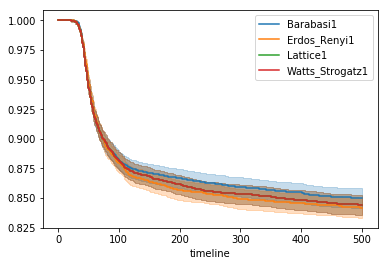

In [56]:
# Still missing some of the data, but this suggest that network struture doesn't matter if you can change your network

b_durations = np.array([])
e_durations = np.array([])
l_durations = np.array([])
w_durations = np.array([])

for exp_name in ["new_rep_dis", "rep_blendHighHigh", "rep_blendLowHigh"]:  # obvi missing some of the data.

    if not os.path.isfile("./BehaviorSpace_output/cleaned_" + exp_name + "-spreadsheet.csv"):
        with open("./BehaviorSpace_output/dynamic_network " + exp_name + "-spreadsheet.csv", 'rb') as infile:
                data_in = infile.readlines()

        with open("./BehaviorSpace_output/cleaned_" + exp_name + "-spreadsheet.csv", 'wb') as outfile:
            outfile.writelines(data_in[6:])
        
    df = pd.read_csv("./BehaviorSpace_output/cleaned_" + exp_name + "-spreadsheet.csv")
    
    print(exp_name, df.iloc[24].describe())
    

    for ii in range(1, df.shape[1], 2): # the cols with the data in them
        network = df.iloc[11, ii].strip('"')

        if network == "Barabasi1":
            b_durations = np.append(b_durations, int(df.iloc[24, ii]))
        elif network == "Erdos_Renyi1":
            e_durations = np.append(e_durations, int(df.iloc[24, ii]))
        elif network == "Lattice1":
            l_durations = np.append(l_durations, int(df.iloc[24, ii]))
        elif network == "Watts_Strogratz1":
            w_durations = np.append(w_durations, int(df.iloc[24, ii]))
            
            
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

ax = plt.subplot(111)


for network in ["Barabasi1", "Erdos_Renyi1", "Lattice1", "Watts_Strogatz1"]:
    if network == "Barabasi1":
        durations = b_durations 
    elif network == "Erdos_Renyi1":
        durations = e_durations
    elif network == "Lattice1":
        durations = l_durations
    elif network == "Watts_Strogratz1":
        durations = w_durations
        
    deaths = np.where(durations >= 500, 0, 1)

    print(durations.shape)
    print(deaths.shape)
    
    kmf = KaplanMeierFitter()

    kmf.fit(durations, event_observed=deaths, label = network)
    kmf.plot(ax=ax)

### Still should include the logrank tests down here

# Color change strats

new_rep_dis count     19201
unique      194
top         500
freq      16376
Name: 24, dtype: object
rep_blendHighHigh count     19201
unique      312
top         500
freq      16150
Name: 24, dtype: object
rep_blendLowHigh count     19201
unique      290
top         500
freq      16170
Name: 24, dtype: object
(9600,)
(9600,)
(9600,)
(9600,)
(9600,)
(9600,)


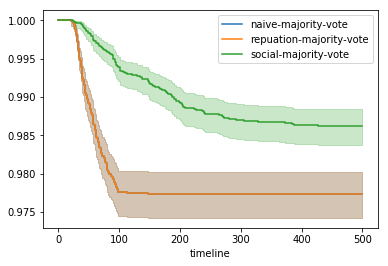

In [66]:
# Still missing some of the data, but this suggest that network struture doesn't matter if you can change your network

naive_durations = np.array([])
rep_durations = np.array([])
social_durations = np.array([])

for exp_name in ["new_rep_dis", "rep_blendHighHigh", "rep_blendLowHigh"]:  # obvi missing some of the data.

    if not os.path.isfile("./BehaviorSpace_output/cleaned_" + exp_name + "-spreadsheet.csv"):
        with open("./BehaviorSpace_output/dynamic_network " + exp_name + "-spreadsheet.csv", 'rb') as infile:
                data_in = infile.readlines()

        with open("./BehaviorSpace_output/cleaned_" + exp_name + "-spreadsheet.csv", 'wb') as outfile:
            outfile.writelines(data_in[6:])
        
    df = pd.read_csv("./BehaviorSpace_output/cleaned_" + exp_name + "-spreadsheet.csv")
    
    print(exp_name, df.iloc[24].describe())
    

    for ii in range(1, df.shape[1], 2): # the cols with the data in them
        color_change_strat = df.iloc[9, ii].strip('"')

        if color_change_strat == "naive-majority-vote":
            naive_durations = np.append(naive_durations, int(df.iloc[24, ii]))
        elif color_change_strat == "reputation-majority-vote":
            rep_durations = np.append(rep_durations, int(df.iloc[24, ii]))
        elif color_change_strat == "social-majority-vote":
            social_durations = np.append(social_durations, int(df.iloc[24, ii]))
       
            
            
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

ax = plt.subplot(111)


for color_change_strat in ["naive-majority-vote", "repuation-majority-vote","social-majority-vote"]:
    if color_change_strat == "naive-majority-vote":
        durations = naive_durations 
    if color_change_strat == "reputation-majority-vote":
        durations = rep_durations
    if color_change_strat == "social-majority-vote":
        durations = social_durations
    
    deaths = np.where(durations >= 500, 0, 1)

    print(durations.shape)
    print(deaths.shape)
    
    kmf = KaplanMeierFitter()

    kmf.fit(durations, event_observed=deaths, label = color_change_strat)
    kmf.plot(ax=ax)

In [60]:
# if I want to do some descriptives on whether how close things are.

convergence_numbers = df.iloc[26:, 1:]

In [64]:
df.iloc[9, 9101]

'"reputation-majority-vote"'

In [16]:
df.shape

(527, 19201)

In [15]:
df.iloc[24].describe()

count     19201
unique      194
top         500
freq      16376
Name: 24, dtype: object

(7200,)
(7200,)
(7200,)
(7200,)
(7200,)
(7200,)
(7200,)
(7200,)


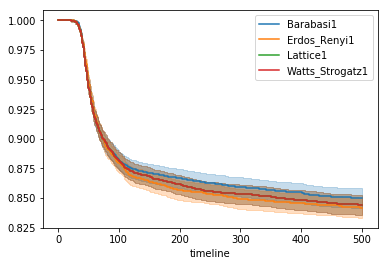

NameError: name 'durations_df' is not defined

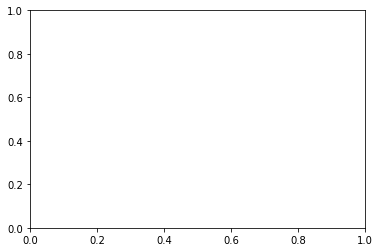

In [33]:
# now every col is the duration
# durations_df = df.groupby(["[run number]", "input-file-name"]).count()
# durations_df = durations_df.reset_index()

ax = plt.subplot(111)


durations = np.array([])

for network in ["Barabasi", "Erdos_Renyi", "Watts_Strogatz"]:
    for i in range(1, 6):
        durations = np.append(durations, 
                              durations_df.loc[durations_df['input-file-name'] == network+str(i)].iloc[: , -1].values)



    deaths = np.where(durations == 501, 0, 1)

    kmf = KaplanMeierFitter()

    kmf.fit(durations, event_observed=deaths, label = network)
    kmf.plot(ax=ax)


In [9]:
from lifelines.statistics import logrank_test

durations = np.array([])

for i in range(1, 6):
    b_durations = np.append(durations, 
                          durations_df.loc[durations_df['input-file-name'] == "Barabasi"+str(i)].iloc[: , -1].values)

    b_deaths = np.where(b_durations == 501, 0, 1)

    
durations = np.array([])

for i in range(1, 6):
    e_durations = np.append(durations, 
                          durations_df.loc[durations_df['input-file-name'] == "Erdos_Renyi"+str(i)].iloc[: , -1].values)

    e_deaths = np.where(e_durations == 501, 0, 1)

durations = np.array([])
    
for i in range(1, 6):
    w_durations = np.append(durations, 
                          durations_df.loc[durations_df['input-file-name'] == "Watts_Strogatz"+str(i)].iloc[: , -1].values)

    w_deaths = np.where(w_durations == 501, 0, 1)


In [10]:
w_deaths

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [11]:
print("Between Barabasi and Watts_Strogatz for random and disengaged")

results = logrank_test(b_durations, w_durations, b_deaths, w_deaths, alpha=.99)

results.print_summary()

print("Between Barabasi and Erdos_Renyi for random and disengaged")

results = logrank_test(b_durations, e_durations, b_deaths, e_deaths, alpha=.99)

results.print_summary()

print("Between Erdos_Renyi and Watts_Strogatz for random and disengaged")

results = logrank_test(e_durations, w_durations, e_deaths, w_deaths, alpha=.99)

results.print_summary()

Between Barabasi and Watts_Strogatz for random and disengaged
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
test_statistic    p  -log2(p)
          0.58 0.45      1.16
Between Barabasi and Erdos_Renyi for random and disengaged
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
test_statistic    p  -log2(p)
          0.11 0.74      0.43
Between Erdos_Renyi and Watts_Strogatz for random and disengaged
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
test_statistic    p  -log2(p)
          0.25 0.62      0.70
